# Lab 4 – Predicting a Continuous Target with Regression (Titanic)

### Name: Mindy Cruz
### Date: 4/11/2025
### Intro: 

In this lab, we’ll predict fare, the amount of money paid for the journey, using features in the Titanic dataset.

# Imports

In [153]:
#imports

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Section 1. Import and Inspect the Data

In [154]:

# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Section 2. Data Exploration and Preparation

In [155]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Section 3. Feature Selection and Justification

In [156]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4. pclass
X4 = titanic[['pclass']]
y4 = titanic['fare']

__Reflections:__

- Why might these features affect a passenger’s fare:
    - 
- List all available features:
- Which other features could improve predictions and why:
- How many variables are in your Case 4:
- Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 
 

# Section 4. Train a Regression Model (Linear Regression)

__4.2 Train and Evaluate Linear Regression Models__


In [157]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

__4.2 Train and Evaluate Linear Regression Models__

In [158]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)


__4.3 Report Performance__

In [159]:
print("Case 1 Age:")
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()
print("Case 2: Family Size:")
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print()
print("Case 3: Age and Family Size:")
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print()
print("Case 4: Pclass:")
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_test4)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))
print()


Case 1 Age:
Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364

Case 2: Family Size:
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641

Case 3: Age and Family Size:
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688

Case 4: Pclass:
Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056



| Case | Training R² | Test R²| Test RMSE| Test MAE| 
|------|-----------|--------|-----------|-------|
| Case 1 | .00995 | .00341 | 37.97164 | 25.28637 |
| Case 2 | .04915 | .02223 | 37.61149 | 25.02534 | 
| Case 3 | .07347 | .04978 | 37.07775 | 24.28493 | 
| Case 4 | .30058 | .30160 | 31.78733 | 20.65370 | 


Section 4 Reflection Questions - answer these in your notebook (in a Markdown cell):

Compare the train vs test results for each.

- Did Case 1 overfit or underfit? Explain:
    - Underfit- the R2 values are low
- Did Case 2 overfit or underfit? Explain:
    - Underfit- just like case one the R2 values are low and tells us we arent really getting anything form the data.
- Did Case 3 overfit or underfit? Explain:
    - Underfit- R2 values are still really low
- Did Case 4 overfit or underfit? Explain:
    - neither- R2 values are almost a perfect match which tells us its a good fit. 

Adding Age

- Did adding age improve the model:
    - Yes, R2 increased(improvement) and RMSE and MAE decreased which means our errors are reducing
- Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 
    - with this data set there could be some relation to ticket prices based on class and family size. 

Worst

- Which case performed the worst:
    - Case 1
- How do you know: 
    - it has the lowest R2 values, and the Hights RMSE and MAE values 
- Do you think adding more training data would improve it (and why/why not):
    - no, underfitting

Best

- Which case performed the best:
    - Case 4
- How do you know: 
    - Out of all the case its had the highest R2s and lowest RSME and MAE, when the R2 values are so close it tells us the model is good
- Do you think adding more training data would improve it (and why/why not):  
    - Yes, the model is already good, based on the R2 values, adding more data could makes the model even better.

# Section 5. Compare Alternative Models

__5.1 Ridge Regression (L2 penalty)__

In [160]:

ridge_model = Ridge(alpha=1.0)

#train
ridge_model.fit(X4_train, y4_train)

#training and test data
y_train_pred_ridge = ridge_model.predict(X4_train)
y_test_pred_ridge = ridge_model.predict(X4_test)

# Evaluate
print("Ridge Training R²:", r2_score(y4_train, y_train_pred_ridge))
print("Ridge Test R²:", r2_score(y4_test, y_test_pred_ridge))
print("Ridge Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_test_pred_ridge)))
print("Ridge Test MAE:", mean_absolute_error(y4_test, y_test_pred_ridge))

Ridge Training R²: 0.3005575470984282
Ridge Test R²: 0.30224715597914653
Ridge Test RMSE: 31.77263998896141
Ridge Test MAE: 20.642499405545284


__5.2 Elastic Net (L1 + L2 combined)__

In [161]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)
y_pred_elastic = elastic_model.predict(X1_test)


print("Elastic Net R²:", r2_score(y4_test, y_pred_elastic))
print("Elastic Net RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_elastic)))
print("Elastic Net MAE:", mean_absolute_error(y4_test, y_pred_elastic))

Elastic Net R²: 0.0034751035911166905
Elastic Net RMSE: 37.97052227706171
Elastic Net MAE: 25.284019721480387


__5.3 Polynomial Regression__

In [162]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [163]:

poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Train the model on Case 4 poly data
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)

# Predict
y_train_pred_poly = poly_model.predict(X4_train_poly)
y_test_pred_poly = poly_model.predict(X4_test_poly)

# Evaluate
print("Polynomial Regression Training R²:", r2_score(y4_train, y_train_pred_poly))
print("Polynomial Regression Test R²:", r2_score(y4_test, y_test_pred_poly))
print("Polynomial Regression Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_test_pred_poly)))
print("Polynomial Regression Test MAE:", mean_absolute_error(y4_test, y_test_pred_poly))

Polynomial Regression Training R²: 0.35329230021586
Polynomial Regression Test R²: 0.33610336564092946
Polynomial Regression Test RMSE: 30.992222956832812
Polynomial Regression Test MAE: 19.248370731275575


__5.4 Visualize Polynomial Cubic Fit (for 1 input feature)__

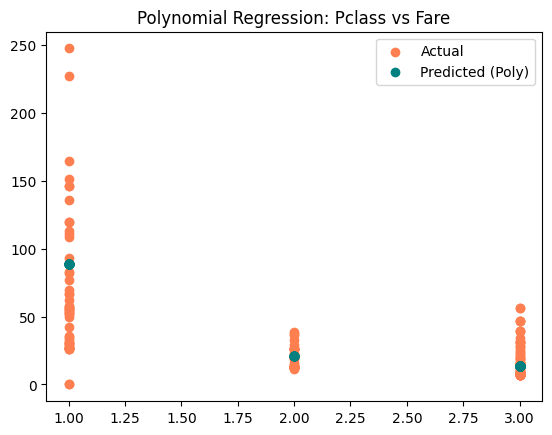

In [169]:
plt.scatter(X4_test, y4_test, color='coral', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='teal', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Pclass vs Fare")
plt.show()


__5.4 Compare All Models__

| Case | Training R² | Test R²| Test RMSE| Test MAE| 
|------|-----------|--------|-----------|-------|
| Ridge | .30055 | .30224| 31.7726 | 20.6424| 
| NET(combined R2s)| .00347 | .00347 | 37.9705| 25.2840 | 
| Polynomial | .3532 | .3336 | 30.9922 | 19.24837| 



__5.5 Visualize Higher Order Polynomial (for the same 1 input case)__

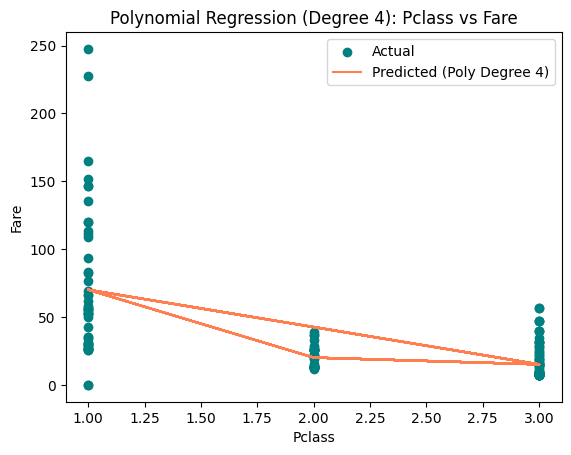

In [184]:
poly_degree_4 = PolynomialFeatures(degree=4)
X4_test_poly_4 = poly_degree_4.fit_transform(X4_test) 

# Fit the polynomial regression model
poly_model_4 = LinearRegression()
poly_model_4.fit(X4_test_poly_4, y4_test)

# Predictions using the degree 4 polynomial
y_pred_poly_4 = poly_model_4.predict(X4_test_poly_4)

# Plotting the results
plt.scatter(X4_test, y4_test, color='teal', label='Actual')
plt.plot(X4_test, y_pred_poly_4, color='Coral', label='Predicted (Poly Degree 4)')
plt.legend()
plt.title("Polynomial Regression (Degree 4): Pclass vs Fare")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

# Section 6. Final Thoughts & Insights


__6.1 Summarize Findings__

- What features were most useful?
    - Pclass was my most successful feature

- What regression model performed best? 
    - Linear 

- How did model complexity or regularization affect results?
    - regularization models work better for this problem

__6.2 Discuss Challenges__

- Was fare hard to predict? Why?
    - yes because it correlated with multiple features

- Did skew or outliers impact the models?
    - Outliers impact these models